**<h2>1. Data Preprocessing</h2>**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/potato_weather.csv', index_col=0)
df = df.dropna(axis=0)
df = df.drop(['Avg_Price'],axis=1)
df = df.drop(['Sup'],axis=1)
df = df.drop(['sobimul'],axis=1)
df = df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [ ]:
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df = pd.get_dummies(df, columns =['DayOfWeek'], prefix='W', drop_first=True)

In [ ]:
df.tail()

,Date,Rain,Wind,Temp,Oil,nongmul,Price,W_1,W_2,W_3,W_4
2390,2022-09-26,0.0,1.7,20.0,1889.31,8.7,415.0,0,0,0,0
2391,2022-09-27,0.0,1.6,20.9,1889.31,8.7,415.0,1,0,0,0
2392,2022-09-28,0.0,1.8,20.4,1889.31,8.7,415.0,0,1,0,0
2393,2022-09-29,0.0,1.4,20.4,1889.31,8.7,415.0,0,0,1,0
2394,2022-09-30,0.0,1.6,20.7,1889.31,8.7,415.0,0,0,0,1


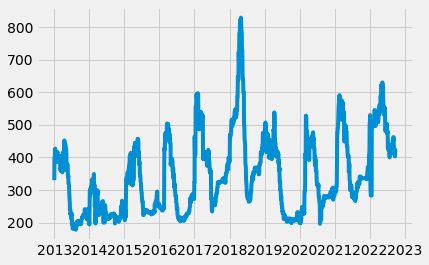

In [ ]:
plt.plot(df['Date'], df['Price'])

In [ ]:
train_split_idx = 1963 # Time Series Validation Test 용도로 일단 지정해놓고, 추후 test 기준 마지막 행으로 지정 예정
window_size = 21 # 21개로 예측을 진행할 것
future = 1 # 21개의 데이터로 하루 뒤의 날짜를 예측할 것

In [ ]:
x_train = df.iloc[:train_split_idx - future + 1, 0:]
y_train = df.iloc[window_size + future - 1:train_split_idx + 1,[6]]

In [ ]:
print(x_train)

           Date  Rain  Wind  Temp      Oil  nongmul  Price  W_1  W_2  W_3  W_4
0    2013-01-02   0.0   4.2 -11.7  1749.59      3.1  330.0    0    1    0    0
1    2013-01-03   0.0   2.8 -13.2  1749.59      3.1  380.0    0    0    1    0
2    2013-01-04   0.0   1.8 -10.7  1749.59      3.1  398.0    0    0    0    1
3    2013-01-07   0.0   1.7  -5.1  1749.59      3.1  398.0    0    0    0    0
4    2013-01-08   0.0   2.2  -4.6  1749.59      3.1  411.0    1    0    0    0
...         ...   ...   ...   ...      ...      ...    ...  ...  ...  ...  ...
1958 2020-12-24   0.0   2.9   2.6  1168.32     -1.7  284.0    0    0    1    0
1959 2020-12-28   1.3   1.4   6.7  1168.32     -1.7  282.0    0    0    0    0
1960 2020-12-29   0.2   2.9   0.1  1168.32     -1.7  282.0    1    0    0    0
1961 2020-12-30   0.0   4.1 -10.9  1168.32     -1.7  292.0    0    1    0    0
1962 2020-12-31   0.0   2.4  -8.9  1168.32     -1.7  292.0    0    0    1    0

[1963 rows x 11 columns]


In [ ]:
print(y_train)

      Price
21    410.0
22    416.0
23    416.0
24    416.0
25    416.0
...     ...
1959  282.0
1960  282.0
1961  292.0
1962  292.0
1963  295.0

[1943 rows x 1 columns]


In [ ]:
x_test = df.iloc[train_split_idx - window_size + 1:2394, 0:] # 향후 2394 은 마지막행으로 수정할 예정
y_test = df.iloc[train_split_idx+1:,[6]]

In [ ]:
print(x_test)

           Date  Rain  Wind  Temp      Oil  nongmul  Price  W_1  W_2  W_3  W_4
1943 2020-12-02   0.0   1.8   2.4  1168.32     -1.7  295.0    0    1    0    0
1944 2020-12-03   0.0   2.7   0.7  1168.32     -1.7  302.0    0    0    1    0
1945 2020-12-07   0.0   2.6   3.4  1168.32     -1.7  302.0    0    0    0    0
1946 2020-12-08   0.0   2.0  -0.5  1168.32     -1.7  304.0    1    0    0    0
1947 2020-12-09   0.0   1.5   1.5  1168.32     -1.7  304.0    0    1    0    0
...         ...   ...   ...   ...      ...      ...    ...  ...  ...  ...  ...
2389 2022-09-23   3.3   3.1  17.5  1889.31      8.7  415.0    0    0    0    1
2390 2022-09-26   0.0   1.7  20.0  1889.31      8.7  415.0    0    0    0    0
2391 2022-09-27   0.0   1.6  20.9  1889.31      8.7  415.0    1    0    0    0
2392 2022-09-28   0.0   1.8  20.4  1889.31      8.7  415.0    0    1    0    0
2393 2022-09-29   0.0   1.4  20.4  1889.31      8.7  415.0    0    0    1    0

[451 rows x 11 columns]


In [ ]:
print(y_test)

      Price
1964  295.0
1965  295.0
1966  295.0
1967  295.0
1968  295.0
...     ...
2390  415.0
2391  415.0
2392  415.0
2393  415.0
2394  415.0

[431 rows x 1 columns]


In [ ]:
x_train_scaled = x_train.loc[:, 'Rain':]
x_test_scaled = x_test.loc[:, 'Rain':]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_scaled.values)
x_train_scaled.loc[:,:] = scaler.transform(x_train_scaled.values)
x_test_scaled.loc[:,:] = scaler.transform(x_test_scaled.values)

In [ ]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
train_data = timeseries_dataset_from_array(x_train_scaled, y_train, sequence_length=window_size, batch_size=1)
test_data = timeseries_dataset_from_array(x_test_scaled, y_test, sequence_length=window_size, batch_size=1)

In [ ]:
for batch in test_data.take(1):
  inputs, targets = batch

print(inputs, inputs.shape)
print(targets, targets.shape)

tf.Tensor(
[[[0.         0.19298246 0.35463918 0.14236916 0.12195122 0.1797235
   0.         1.         0.         0.        ]
  [0.         0.35087719 0.31958763 0.14236916 0.12195122 0.19047619
   0.         0.         1.         0.        ]
  [0.         0.33333333 0.37525773 0.14236916 0.12195122 0.19047619
   0.         0.         0.         0.        ]
  [0.         0.22807018 0.29484536 0.14236916 0.12195122 0.19354839
   1.         0.         0.         0.        ]
  [0.         0.14035088 0.33608247 0.14236916 0.12195122 0.19354839
   0.         1.         0.         0.        ]
  [0.         0.1754386  0.42474227 0.14236916 0.12195122 0.19815668
   0.         0.         1.         0.        ]
  [0.         0.19298246 0.41443299 0.14236916 0.12195122 0.19815668
   0.         0.         0.         1.        ]
  [0.         0.47368421 0.14639175 0.14236916 0.12195122 0.14132104
   0.         0.         0.         0.        ]
  [0.         0.36842105 0.13402062 0.14236916 0.12195

**<h2>2. LSTM Model </h2>**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow import keras

model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, 21, 10), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 32)                   5504      
                                                                 
 dropout_1 (Dropout)         (1, 32)                   0         
                                                                 
 dense_1 (Dense)             (1, 1)                    33        
                                                                 
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)

In [ ]:
num_epochs = 200
history = LossHistory()
history.init()

for epoch_idx in range(num_epochs):
  print('epochs:' + str(epoch_idx))
  model.fit(train_data, validation_data=test_data, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history, checkpoint_cb, early_stopping_cb])
  model.reset_states()

epochs:0
1943/1943 - 9s - loss: 96588.5312 - mae: 289.4554 - val_loss: 143397.7969 - val_mae: 364.8799 - 9s/epoch - 5ms/step
epochs:1
1943/1943 - 7s - loss: 70670.5234 - mae: 240.2979 - val_loss: 112010.0859 - val_mae: 318.9828 - 7s/epoch - 4ms/step
epochs:2
1943/1943 - 7s - loss: 51305.8750 - mae: 195.5421 - val_loss: 86494.5234 - val_mae: 276.1073 - 7s/epoch - 4ms/step
epochs:3
1943/1943 - 8s - loss: 37445.2891 - mae: 155.2746 - val_loss: 66327.2422 - val_mae: 236.7868 - 8s/epoch - 4ms/step
epochs:4
1943/1943 - 8s - loss: 27496.6367 - mae: 122.5736 - val_loss: 50981.9609 - val_mae: 201.7974 - 8s/epoch - 4ms/step
epochs:5
1943/1943 - 8s - loss: 21003.8125 - mae: 102.3307 - val_loss: 40116.0781 - val_mae: 172.7898 - 8s/epoch - 4ms/step
epochs:6
1943/1943 - 7s - loss: 17574.8691 - mae: 95.3259 - val_loss: 32837.6523 - val_mae: 150.6291 - 7s/epoch - 4ms/step
epochs:7
1943/1943 - 7s - loss: 16138.2109 - mae: 94.1798 - val_loss: 28239.6895 - val_mae: 136.3625 - 7s/epoch - 4ms/step
epochs:8

**<h2>3. Testing Model </h2>**

In [ ]:
model.evaluate(train_data, batch_size=1)

1943/1943 [==============================] - 4s 2ms/step - loss: 315.2898 - mae: 10.3390


[315.2898254394531, 10.338983535766602]

In [ ]:
model.evaluate(test_data, batch_size=1)

431/431 [==============================] - 1s 2ms/step - loss: 616.1523 - mae: 17.7441


[616.15234375, 17.74414825439453]

In [ ]:
model2 = keras.models.load_model('/content/sample_data/best-model.h5')

In [ ]:
model2.evaluate(train_data, batch_size=1)

1943/1943 [==============================] - 6s 3ms/step - loss: 265.7100 - mae: 8.9670


[265.71002197265625, 8.967033386230469]

In [ ]:
model2.evaluate(test_data, batch_size=1)

431/431 [==============================] - 1s 2ms/step - loss: 429.2422 - mae: 11.7574


[429.2421569824219, 11.757436752319336]

In [ ]:
train_pred = model.predict(train_data)

1943/1943 [==============================] - 4s 2ms/step


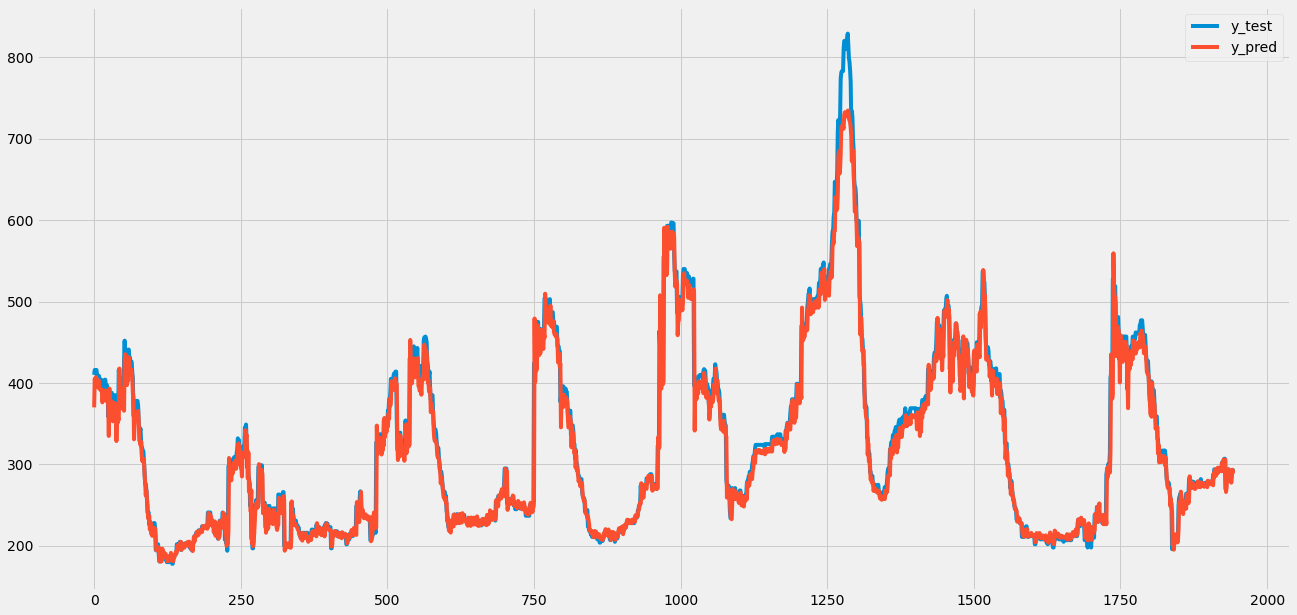

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(train_pred)), y_train, label='y_test')
plt.plot(range(len(train_pred)), train_pred, label='y_pred')
plt.legend()
plt.show()

In [ ]:
test_pred = model.predict(test_data)

431/431 [==============================] - 1s 2ms/step


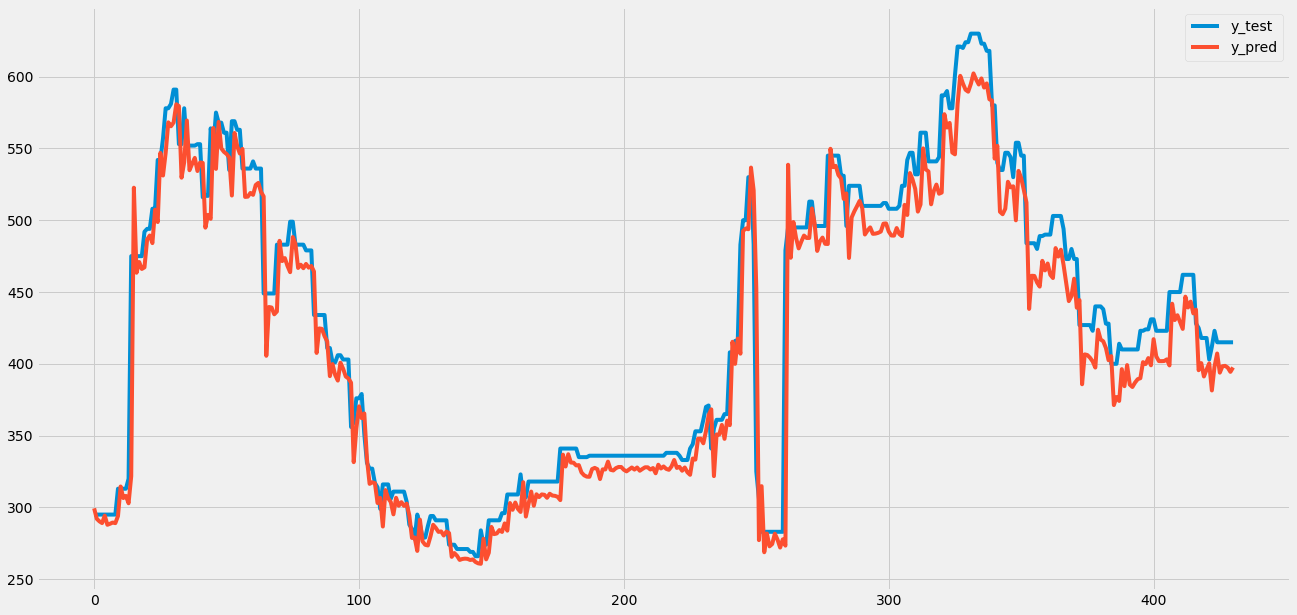

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(test_pred)), y_test, label='y_test')
plt.plot(range(len(test_pred)), test_pred, label='y_pred')
plt.legend()
plt.show()

In [ ]:
train_pred = model2.predict(train_data)

1943/1943 [==============================] - 4s 2ms/step


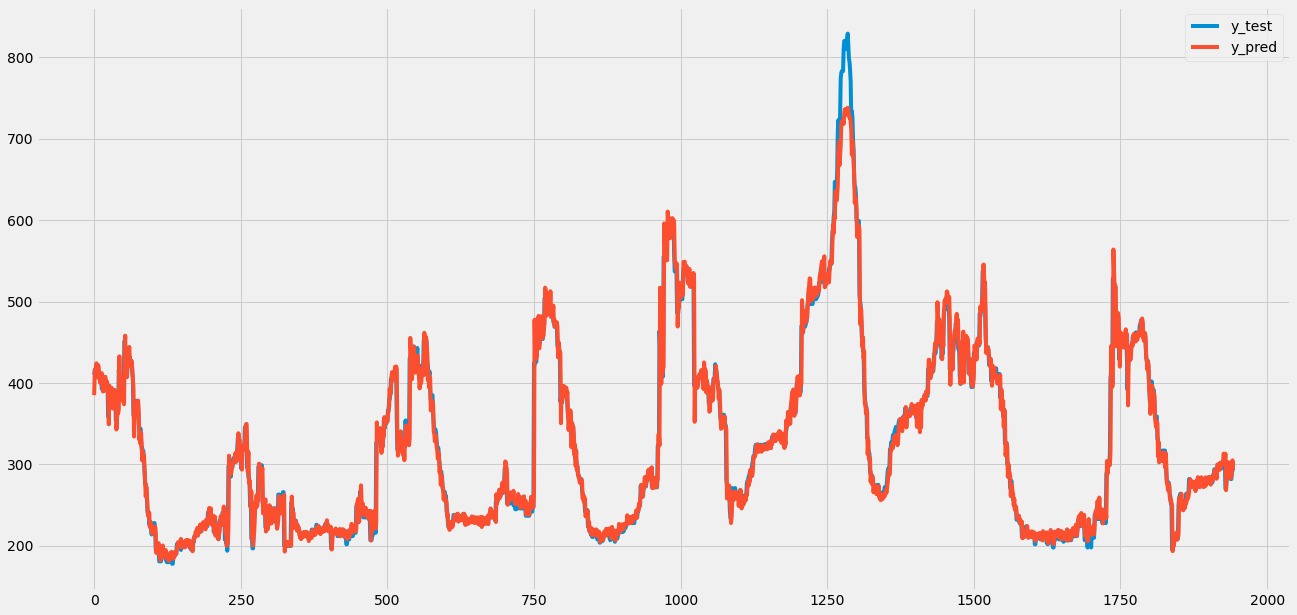

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(train_pred)), y_train, label='y_test')
plt.plot(range(len(train_pred)), train_pred, label='y_pred')
plt.legend()
plt.show()

In [ ]:
test_pred = model.predict(test_data)

431/431 [==============================] - 1s 2ms/step


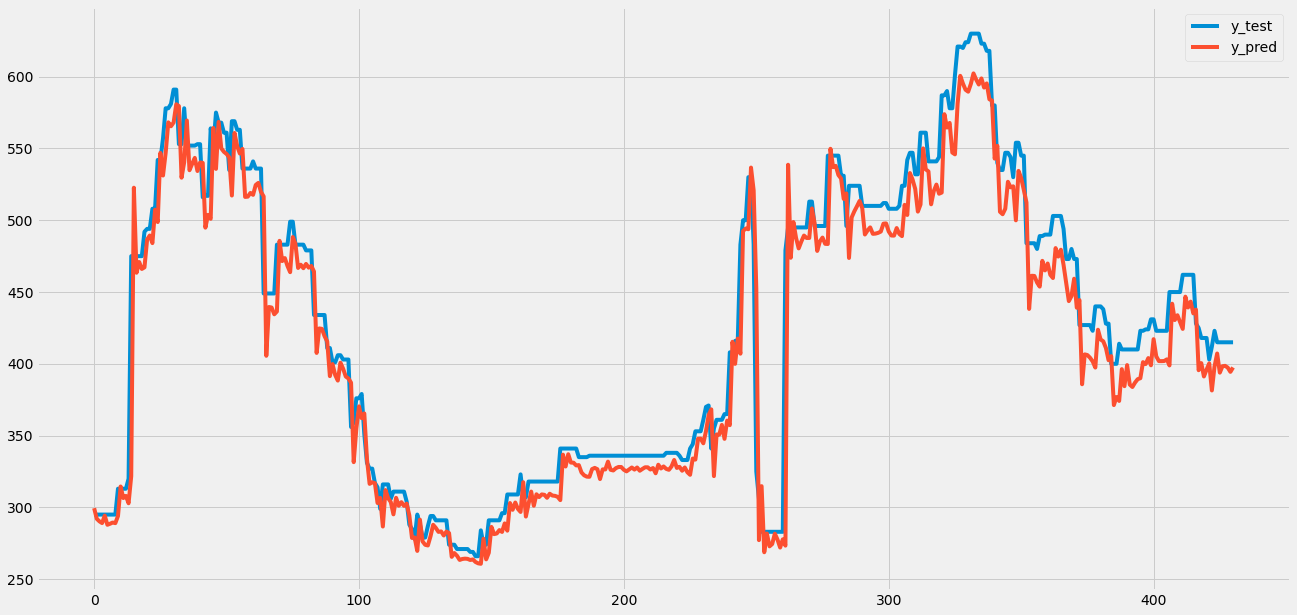

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(test_pred)), y_test, label='y_test')
plt.plot(range(len(test_pred)), test_pred, label='y_pred')
plt.legend()
plt.show()